# ➟ Mount *Google Drive* and *List Files* in Dataset Directory


In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import numpy as np
import pandas as pd
import os

# List files in the dataset directory
dataset_dir = '/content/drive/MyDrive/Brain_Data_Organised'

# Walk through the dataset directory and its subdirectories
for dirname, _, filenames in os.walk(dataset_dir):
    # Loop through the list of filenames in the current directory
    for filename in filenames:
        # Print the full path of each file in the dataset directory
        print(os.path.join(dirname, filename))


# ➟ Brain Image Classification with TensorFlow and Google Drive Integration


In [ ]:
# Ignore warnings to maintain a clean output
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your dataset
dataset_dir = '/content/drive/MyDrive/Brain_Data_Organised'

# Now you can list files in the dataset directory
for dirname, _, filenames in os.walk(dataset_dir):
    # Loop through the list of filenames in the current directory
    for filename in filenames:
        # Print the full path of each file in the dataset directory
        print(os.path.join(dirname, filename))


# ➟ Set Paths for Normal and Stroke Data, and List Files in Respective Directories


In [ ]:
# Set the paths for Normal and Stroke data
normal_path = '/content/drive/MyDrive/Brain_Data_Organised/Normal'
stroke_path = '/content/drive/MyDrive/Brain_Data_Organised/Stroke'

# List files in the Normal directory
print("Files in Normal directory:")
# Loop through the list of files in the Normal directory
for file in os.listdir(normal_path):
    # Print the full path of each file in the Normal directory
    print(os.path.join(normal_path, file))

# List files in the Stroke directory
print("\nFiles in Stroke directory:")
# Loop through the list of files in the Stroke directory
for file in os.listdir(stroke_path):
    # Print the full path of each file in the Stroke directory
    print(os.path.join(stroke_path, file))


# ➟ List and Display Files in Normal and Stroke Folders


In [5]:
# Get the list of files in the Normal and Stroke folders
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

# Display the first few files in each folder
print("Files in Normal folder:")
# Print the first 5 files in the Normal folder
print(normal_folder[:5])

print("\nFiles in Stroke folder:")
# Print the first 5 files in the Stroke folder
print(stroke_folder[:5])


Files in Normal folder:
['110 (5).jpg', '114 (24).jpg', '124 (4).jpg', '114 (5).jpg', '120 (2).jpg']

Files in Stroke folder:
['72 (17).jpg', '67 (12).jpg', '79 (23).jpg', '70 (5).jpg', '71 (12).jpg']


# ➟ Count Images in "Normal" and "Stroke" Data Folders


In [6]:
# Print the number of images in the "Normal" and "Stroke" data folders
print("Images in Normal Data:", len(normal_folder))
print("Images in Stroke Data:", len(stroke_folder))

Images in Normal Data: 1561
Images in Stroke Data: 950


# ➟ Load and Preprocess Images from "Normal" and "Stroke" Folders


In [7]:
from PIL import Image
import numpy as np

# Assuming you have already defined normal_path and stroke_path
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

data = []

# Load and preprocess images from Normal folder
for img_file in normal_folder:
    # Construct the full path to the image
    image_path = os.path.join(normal_path, img_file)

    # Open the image using PIL
    image = Image.open(image_path)

    # Resize the image to (224, 224)
    image = image.resize((224, 224))

    # Convert the image to RGB mode (if it's not already in RGB)
    image = image.convert('RGB')

    # Convert the PIL Image to a NumPy array
    image = np.array(image)

    # Append the preprocessed image to the data list
    data.append(image)

# Load and preprocess images from Stroke folder
for img_file in stroke_folder:
    # Construct the full path to the image
    image_path = os.path.join(stroke_path, img_file)

    # Open the image using PIL
    image = Image.open(image_path)

    # Resize the image to (224, 224)
    image = image.resize((224, 224))

    # Convert the image to RGB mode (if it's not already in RGB)
    image = image.convert('RGB')

    # Convert the PIL Image to a NumPy array
    image = np.array(image)

    # Append the preprocessed image to the data list
    data.append(image)


In [8]:
#The len(data) command will give you the number of elements (i.e., the number of images) in the data list
print(len(data))

2511


In [9]:
image_shape = data[0].shape  # Retrieve the shape (dimensions) of the first preprocessed image in the 'data' list


# ➟ Display and Inspect the First Preprocessed Image


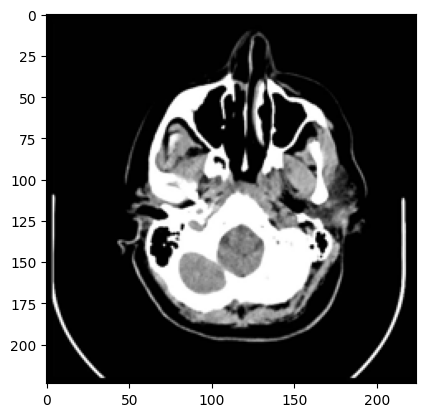

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [10]:
import matplotlib.pyplot as plt

# Display the first preprocessed image using matplotlib
plt.imshow(data[0])
plt.show()

# Print the pixel values of the first preprocessed image in the 'data' list
data[0]


# ➟ Create and Concatenate Labels for "Normal" and "Stroke" Data

In [11]:
# Create a list of labels for the 'Normal' class (0) with the same length as the number of images in the 'Normal' folder
normal_label = [0] * len(normal_folder)

# Create a list of labels for the 'Stroke' class (1) with the same length as the number of images in the 'Stroke' folder
stroke_label = [1] * len(stroke_folder)

# Concatenate the two lists of labels to create a single list of labels for all images
labels = normal_label + stroke_label

# Convert the list of labels to a NumPy array for further use in machine learning models
labels = np.array(labels)


In [12]:
# Concatenate the lists of labels for the 'Normal' and 'Stroke' classes into a single list
Target_label = normal_label + stroke_label



In [13]:
# Check the length of the combined list of labels for 'Normal' and 'Stroke' classes
len(Target_label)


2511

# ➟ Create NumPy Arrays for Features (x) and Labels (y)


In [14]:
# Convert the list of preprocessed images ('data') to a NumPy array
x = np.array(data)

# Convert the list of labels ('Target_label') to a NumPy array
y = np.array(Target_label)


# ➟ Display First Image and Pixel Values from the Feature Array (x)


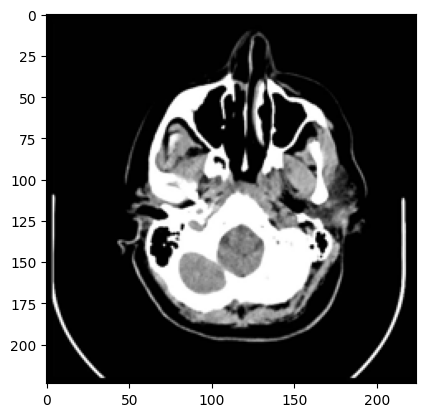

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [15]:
import matplotlib.pyplot as plt

# Display the first preprocessed image using matplotlib
plt.imshow(x[0])
plt.show()

# Display the pixel values of the first preprocessed image in the 'x' array
x[0]


In [16]:
# Print the array of labels ('y')
print(y)


[0 0 0 ... 1 1 1]


# ➟ Split Data into Training and Testing Sets


In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=True)

# Print the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (2259, 224, 224, 3)
Shape of x_test: (252, 224, 224, 3)
Shape of y_train: (2259,)
Shape of y_test: (252,)


# ➟ Display Sample Images from the Training Set with Actual Labels


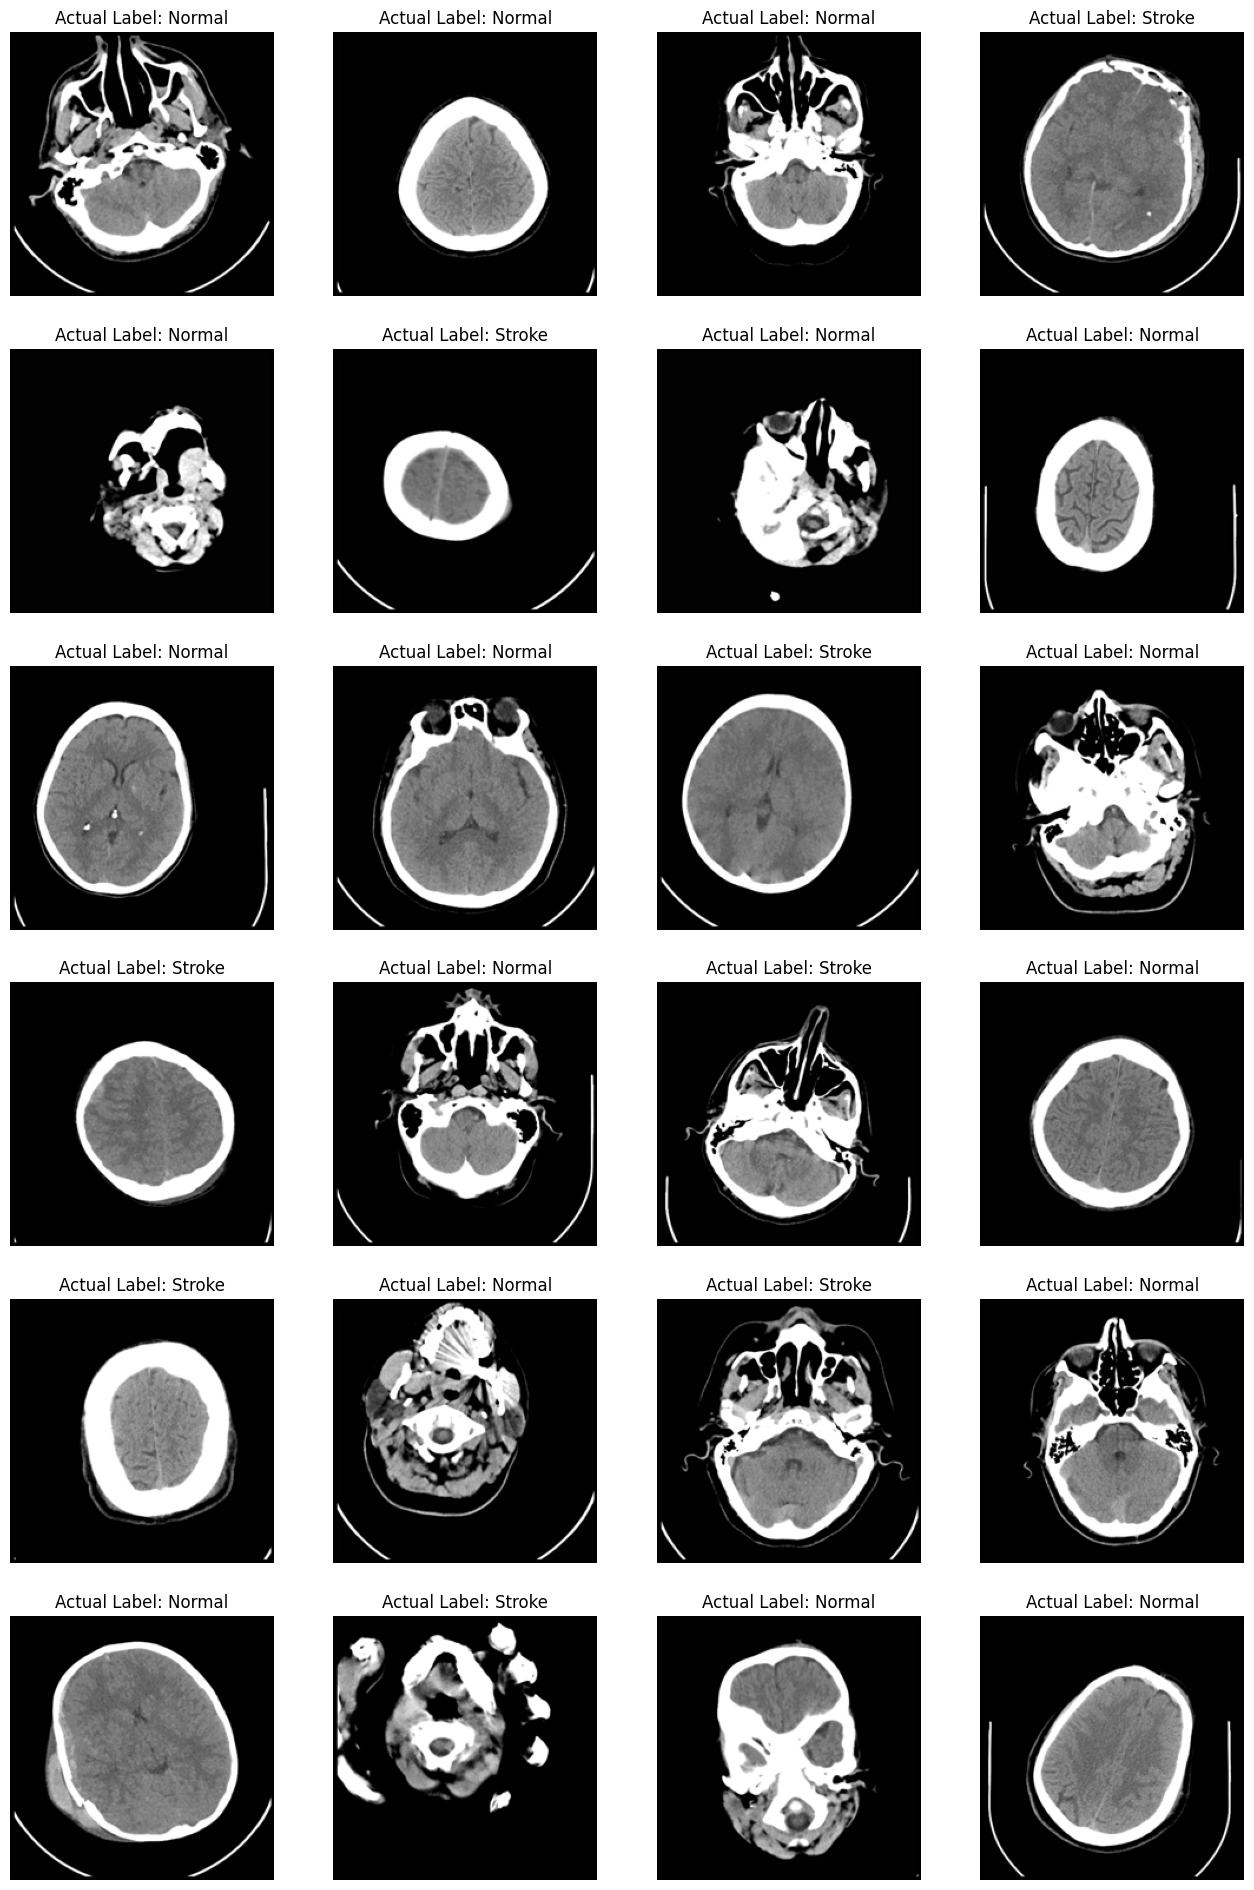

In [18]:
class_labels = ["Normal", "Stroke"]

# Create a subplot grid for displaying images
plt.figure(figsize=(16, 24))
for i in range(24):
    # Add a subplot to the grid
    plt.subplot(6, 4, i+1)

    # Display the image
    plt.imshow(x_train[i])

    # Set the title with the actual label
    plt.title(f"Actual Label: {class_labels[y_train[i]]}")

    # Turn off axis ticks for better visualization
    plt.axis("off")

# Show the grid of images
plt.show()


# ➟ Convolutional Neural Network (CNN) Model


In [19]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a sequential model
model = Sequential()

# Add the first convolutional layer with max pooling
model.add(Conv2D(filters=100, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer with max pooling
model.add(Conv2D(filters=80, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the third convolutional layer with max pooling
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())

# Add the first dense (fully connected) layer with ReLU activation
model.add(Dense(units=500, activation="relu"))
# Add dropout for regularization
model.add(Dropout(0.2))

# Add the second dense (fully connected) layer with ReLU activation
model.add(Dense(units=500, activation="relu"))
# Add dropout for regularization
model.add(Dropout(0.2))

# Add the output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation="sigmoid"))

# Compile the model with Adam optimizer and binary crossentropy loss for binary classification
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 80)      72080     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 80)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        46144     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

# ➟ Train Convolutional Neural Network (CNN) Model


In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
71/71 [==============================] - 699s 10s/step - loss: 9.8946 - accuracy: 0.7140 - val_loss: 0.3071 - val_accuracy: 0.8929
Epoch 2/5
11/71 [===>..........................] - ETA: 8:19 - loss: 0.2041 - accuracy: 0.9176

Model Evaluation on Test and Train Data

# ➟ Evaluate CNN Model on Test and Train Data


In [ ]:
# Evaluate the model on the test data
loss_test, acc_test = model.evaluate(x_test, y_test)
print("Loss on Test Data:", loss_test)
print("Accuracy on Test Data:", acc_test)

# Evaluate the model on the training data
loss_train, acc_train = model.evaluate(x_train, y_train)
print("Loss on Train Data:", loss_train)
print("Accuracy on Train Data:", acc_train)


# ➟ Predict Probabilities and Classify Test Data using (CNN) Model


The code uses the trained model (model) to predict probabilities (y_pred_test) for the test data.

---
Then, it converts these probabilities to binary labels (y_pred_test_label) using a threshold of 0.5. If the predicted probability is greater than or equal to 0.5,

---

it is assigned the label 1; otherwise, it is assigned the label 0.

In [ ]:
# Predict probabilities on the test data using the trained model
y_pred_test = model.predict(x_test)

# Convert predicted probabilities to binary labels using a threshold of 0.5
y_pred_test_label = [1 if i >= 0.5 else 0 for i in y_pred_test]


# ➟ Compare Actual and Predicted Labels on Test Data


In [ ]:
# Assuming you have made predictions and stored them in y_pred_test_prob
y_pred_test_prob = model.predict(x_test)

# Convert predicted probabilities to binary labels using a threshold of 0.5
y_pred_test_label = (y_pred_test_prob > 0.5).astype(int)

# Print the actual and predicted labels for the first 10 samples
print("Actual Label:", y_test[:10])
print("Predicted Label:", y_pred_test_label[:10].flatten())


# ➟ Evaluate Classification Metrics on Test Data


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have made predictions and stored them in y_pred_test_label
print("----- Metrics Evaluation On Test Data -----")
print()

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_label))
print()

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_label))


# ➟ Visualize Actual and Predicted Labels on Sample Test Data


In [ ]:
class_labels = ["Normal", "Stroke"]

# Create a subplot grid for displaying images
plt.figure(figsize=(16, 32))
for i in range(30):
    # Add a subplot to the grid
    plt.subplot(8, 4, i+1)

    # Display the image
    plt.imshow(x_test[i])

    # Set the title with actual and predicted labels
    plt.title(f"Actual: {class_labels[int(y_test[i])]} \nPredicted: {class_labels[int(y_pred_test_label[i])]}")

    # Turn off axis ticks for better visualization
    plt.axis("off")

# Show the grid of images
plt.show()
